In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns

plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
import glob
import os

import pandas as pd

In [3]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        df = pd.read_csv(file)

        # Check if the file contains multiple datasets (4 rows) or single dataset (2 rows)
        if len(df) == 4:
            # Handle special case with multiple datasets
            df["Dataset"] = df["Method"].apply(lambda x: x.split()[-1])
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        elif len(df) == 2:
            # Handle standard case
            dataset_name = df["Method"].iloc[0].split()[-1].replace("_dataset", "")
            df["Dataset"] = dataset_name
            if "_train.csv" in str(file):
                df["Dataset"] = dataset_name + "-train"
            if "_test.csv" in str(file):
                df["Dataset"] = dataset_name + "-test"
                
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        else:
            print(f"Warning: Unexpected number of rows ({len(df)}) in file: {file}")

        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)


def process_image_metrics_data(df):
    df = df[~df["Method"].isin(["Transformation", "Method"])]
    df = df.dropna().reset_index(drop=True)
    return df


def create_formatted_dataframe(df):
    metrics = ["NMSE", "PSNR", "SSI"]

    # Create MultiIndex columns
    column_tuples = [(metric, method) for metric in metrics for method in ["PCA", "POLCA"]]
    columns = pd.MultiIndex.from_tuples(column_tuples)

    # Create the new DataFrame
    formatted_data = []

    for dataset in df["Dataset"].unique():
        dataset_df = df[df["Dataset"] == dataset]
        new_row = {}
        for metric in metrics:
            pca_value = dataset_df[dataset_df["Method"] == "PCA"][metric].values[0]
            polca_value = dataset_df[dataset_df["Method"] == "POLCA"][metric].values[0]
            new_row[(metric, "PCA")] = pca_value
            new_row[(metric, "POLCA")] = polca_value
        formatted_data.append(new_row)

    formatted_df = pd.DataFrame(formatted_data, columns=columns)

    # Set index
    formatted_df.index = df["Dataset"].unique()
    formatted_df.index.name = "Dataset"

    return formatted_df

In [4]:
# Main execution
raw_image_metrics = read_csv_files("experiments/*/image_metrics*.csv")
image_metrics = process_image_metrics_data(raw_image_metrics)
formatted_df = create_formatted_dataframe(image_metrics)
print("\nFormatted DataFrame:")
formatted_df


Formatted DataFrame:


NMSE             PSNR              SSI        
                     PCA   POLCA      PCA    POLCA     PCA   POLCA
Dataset                                                           
organcmnist       0.3068  0.4345  16.5479  13.7882  0.3198  0.2471
chestmnist-train  0.1268  0.0787  23.7942  27.8504  0.8592  0.9362
organsmnist       0.3028  0.4529  16.7431  13.5394  0.3119  0.2152
sinusoidal        0.1836  0.0082  20.7204  47.7925  0.8401  0.9996
pathmnist         0.0965  0.1895  24.9296  20.7189  0.5455  0.3483
breastmnist       0.1905  0.2320  23.1601  24.1415  0.6046  0.5834
bloodmnist        0.0839  0.1811  24.2980  17.8792  0.7819  0.5497
dermamnist        0.0422  0.0780  32.1158  27.1547  0.8885  0.7384
mnist             0.5131  0.2630  15.6762  22.1212  0.5378  0.8542
pneumoniamnist    0.0977  0.1429  25.4414  22.4689  0.8376  0.7759
octmnist          0.2461  0.1430  23.9520  29.5733  0.7145  0.8792
cifar10-test      0.1923  0.3008  20.6352  17.1621  0.6145  0.4267
cifar10-train     0.1933  0.1461  20.6411  22.9882  0.6151  0.7450
retinamnist       0.0652  0.1246  34.0477  29.1152  0.9473  0.8614
bent              0.3855  0.0449  13.3663  33.2476  0.3966  0.9926
fmnist-test       0.3580  0.2460  17.1477  21.3137  0.5325  0.7313
fmnist-train      0.3585  0.2107  17.1596  22.3446  0.5332  0.7768

In [5]:
# Generate LaTeX table
latex_table = formatted_df.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Image Metrics Comparison",
    label="tab:image_metrics_comparison",
    position="htbp",
    float_format="%.4f",
    column_format="lrrrrrr",
)
print(latex_table)
with open("experiments/image_metrics_comparison.tex", "w") as f:
    f.write(latex_table)

\begin{table}[htbp]
\caption{Image Metrics Comparison}
\label{tab:image_metrics_comparison}
\begin{tabular}{lrrrrrr}
\toprule
 & \multicolumn{2}{r}{NMSE} & \multicolumn{2}{r}{PSNR} & \multicolumn{2}{r}{SSI} \\
 & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset &  &  &  &  &  &  \\
\midrule
organcmnist & 0.3068 & 0.4345 & 16.5479 & 13.7882 & 0.3198 & 0.2471 \\
chestmnist-train & 0.1268 & 0.0787 & 23.7942 & 27.8504 & 0.8592 & 0.9362 \\
organsmnist & 0.3028 & 0.4529 & 16.7431 & 13.5394 & 0.3119 & 0.2152 \\
sinusoidal & 0.1836 & 0.0082 & 20.7204 & 47.7925 & 0.8401 & 0.9996 \\
pathmnist & 0.0965 & 0.1895 & 24.9296 & 20.7189 & 0.5455 & 0.3483 \\
breastmnist & 0.1905 & 0.2320 & 23.1601 & 24.1415 & 0.6046 & 0.5834 \\
bloodmnist & 0.0839 & 0.1811 & 24.2980 & 17.8792 & 0.7819 & 0.5497 \\
dermamnist & 0.0422 & 0.0780 & 32.1158 & 27.1547 & 0.8885 & 0.7384 \\
mnist & 0.5131 & 0.2630 & 15.6762 & 22.1212 & 0.5378 & 0.8542 \\
pneumoniamnist & 0.0977 & 0.1429 & 25.4414 & 22.4689 & 0.8376 & 0.7759 \\

In [6]:
# Reshape the DataFrame
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_1": "Metric", "level_2": "Method", 0: "Value"})
)
df_long.head(20)

,Dataset,Metric,Method,Value
0,organcmnist,NMSE,PCA,0.3068
1,organcmnist,NMSE,POLCA,0.4345
2,organcmnist,PSNR,PCA,16.5479
3,organcmnist,PSNR,POLCA,13.7882
4,organcmnist,SSI,PCA,0.3198
5,organcmnist,SSI,POLCA,0.2471
6,chestmnist-train,NMSE,PCA,0.1268
7,chestmnist-train,NMSE,POLCA,0.0787
8,chestmnist-train,PSNR,PCA,23.7942
9,chestmnist-train,PSNR,POLCA,27.8504


In [7]:
from sklearn.preprocessing import minmax_scale


def min_max_metric(df_in, metric):
    df = pd.DataFrame(df_in.copy())
    # Applying min-max normalization
    df.loc[df["Metric"] == metric, "Value"] = minmax_scale(df[df["Metric"] == metric]["Value"], feature_range=(0., 1.))
    return df

In [8]:
df = pd.DataFrame(df_long.copy())

In [9]:
df = min_max_metric(df,"NMSE")
df = min_max_metric(df,"PSNR")
df = min_max_metric(df,"SSI")

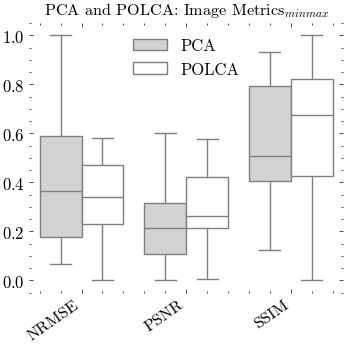

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.boxplot(
    data=df,
    x="Metric",
    y="Value",
    hue="Method",
    fill=True,
    palette={"PCA": "lightgray", "POLCA": "white"},
    fliersize=0,
    gap=0.0,
)
plt.xlabel("")
plt.ylabel("")
# plt.ylim([-0.01,1.4]);
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["NRMSE", "PSNR", "SSIM"], rotation=35, ha="right", fontsize="small")
ax.set_title("PCA and POLCA: Image Metrics$_{minmax}$", fontsize="small")

# Add in points to show each observation
plt.legend()
# Tweak the visual presentation
sns.despine(trim=False, left=True, right=True, top=True, bottom=True)
plt.savefig("experiments/image_metrics_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

In [11]:
def normalize_and_aggregate_results(df_long):
    """
    Normalize 'Value' within each Dataset, then aggregate by taking the mean across datasets.

    :param df_long: Pandas DataFrame with columns: Dataset, Classifier, Metric, Method, Value
    :return: Aggregated DataFrame with normalized mean values
    """
    df = pd.DataFrame(df_long.copy())
    # Min-max normalization of PSNR values
    psnr_values = df[df["Metric"] == "PSNR"]["Value"]
    psnr_min = psnr_values.min()
    psnr_max = psnr_values.max()

    # Applying min-max normalization
    df.loc[df["Metric"] == "PSNR", "Value"] = (psnr_values - psnr_min) / (psnr_max - psnr_min)
    # Calculate the mean of normalized values across datasets
    df_aggregated = df.groupby(["Metric", "Method"])["Value"].mean().reset_index()

    return df_aggregated

In [12]:
df_norm = normalize_and_aggregate_results(df_long)
df_norm

,Metric,Method,Value
0,NMSE,PCA,0.220165
1,NMSE,POLCA,0.192759
2,PSNR,PCA,0.244597
3,PSNR,POLCA,0.317768
4,SSI,PCA,0.640035
5,SSI,POLCA,0.685941


In [13]:
def create_metric_comparison_plots(df_aggregated, output_prefix="metric_comparison"):
    """
    Create separate bar plots for each metric, comparing PCA and POLCA methods across classifiers using pyplot.

    :param df_aggregated: Pandas DataFrame with columns: Classifier, Metric, Method, Normalized_Value
    :param output_prefix: Prefix for the output files
    """

    # Filter data for the current metric
    metric_data = df_aggregated
    # Get unique classifiers and methods
    metrics = metric_data["Metric"].unique()
    methods = metric_data["Method"].unique()

    # Set up the plot
    fig, ax = plt.subplots(figsize=(3.5, 3.5))

    # Set width of bars and positions
    bar_width = 0.5
    r1 = range(len(metrics))
    r2 = [x + bar_width for x in r1]
    # Use a grayscale colormap
    cmap = plt.get_cmap("Greys")
    colors = [cmap(0.5), cmap(0.0)]  # Darker gray for PCA, lighter gray for POLCA

    # Create bars
    for i, method in enumerate(methods):
        method_data = metric_data[metric_data["Method"] == method]
        positions = r1 if i == 0 else r2
        ax.bar(
            positions,
            method_data["Value"],
            width=bar_width,
            label=method,
            alpha=0.5,
            facecolor=colors[i],
            edgecolor="k",
        )

    # Customize the plot
    ax.set_xlabel("")
    # ax.set_ylabel(f"Normalized values across datasets")
    ax.set_title(f"PCA and POLCA: Image Metrics")
    ax.set_xticks([r + bar_width / 2 for r in range(len(metrics))])
    metrics[list(metrics).index("SSI")] = "SSIM"
    metrics[list(metrics).index("PSNR")] = r"$\frac{PSNR}{minmax}$"
    metrics[list(metrics).index("NMSE")] = "NRMSE"
    ax.set_xticklabels(metrics, rotation=35, ha="right", fontsize="small")
    ax.set_ylim(0, 1.0)

    # Add legend
    ax.legend()

    # Add value labels on the bars
    for i, method in enumerate(methods):
        method_data = metric_data[metric_data["Method"] == method]
        positions = r1 if i == 0 else r2
        for j, value in enumerate(method_data["Value"]):
            ax.text(positions[j], value, f"{value:.2f}", ha="center", va="bottom", fontsize="small")

    # Adjust layout and save
    # plt.tight_layout()
    plt.savefig("experiments/image_metrics_comparison_plot.pdf", dpi=300, bbox_inches="tight")
    plt.plot()

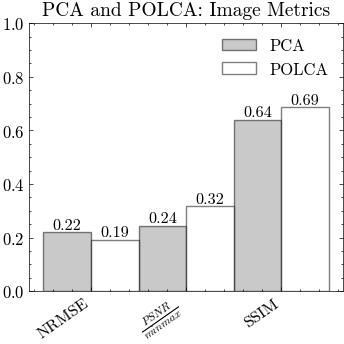

In [14]:
create_metric_comparison_plots(df_norm)